# Assignment-3

**By K.Sai Somanath, 18MCMT28, M.Tech, CS.**

## Question 1

#### Implement the K-means algorithm

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
def k_means(data, k, y):
    centroids = data[np.random.choice(data.shape[0], k, replace=False), :]
    print(centroids)
    clusters = np.array([])
    Y = np.full(data.shape[0], -1)
    
    while np.array_equal(clusters, Y) is False:
        for i in range(data.shape[0]):
            Y[i] = np.argmin(np.linalg.norm(centroids - data[i], axis=1))
        
        clusters = Y.copy()
        
        for i in range(k):
            var = data[Y == i]
            if var.size:
                centroids[i] = np.mean(var, axis=0)
            
    return np.array([data[clusters == x] for x in range(k)]), centroids, np.array([y[clusters == x] for x in range(k)])

#### Applying K-means on Iris dataset

[[-3.22520045 -0.50327991  0.06841363]
 [ 1.29066965 -0.11642525  0.23161356]
 [ 1.94401705  0.18741522  0.17930287]]


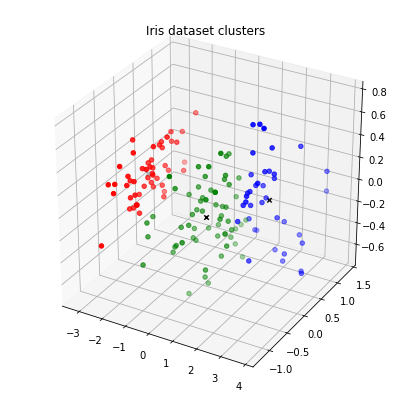

In [19]:
# Read the data
iris = np.genfromtxt('iris.csv', delimiter=',', skip_header=1, usecols=(0,1,2,3))
pca = PCA(n_components=3)
pca.fit(iris)
X_iris = pca.transform(iris)

clusters_iris, centroids_iris, labels_iris = k_means(X_iris, 3, np.array([0] * 50 + [1] * 50 + [2] * 50))

# Show the Iris clusters_iris
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(clusters_iris[0][:, 0], clusters_iris[0][:, 1], clusters_iris[0][:, 2], c='r')
ax.scatter(clusters_iris[1][:, 0], clusters_iris[1][:, 1], clusters_iris[1][:, 2], c='g')
ax.scatter(clusters_iris[2][:, 0], clusters_iris[2][:, 1], clusters_iris[2][:, 2], c='b')
ax.scatter(centroids_iris[:, 0], centroids_iris[:, 1], centroids_iris[:, 2], c='k', marker='x')

plt.title('Iris dataset clusters')
plt.show()

#### Applying K means to the Wine dataset

[[ 0.46220914 -0.33074213 -0.2014765 ]
 [ 2.7074913  -1.75196741 -0.64311361]
 [-2.4655558  -2.1937983  -0.91878096]]


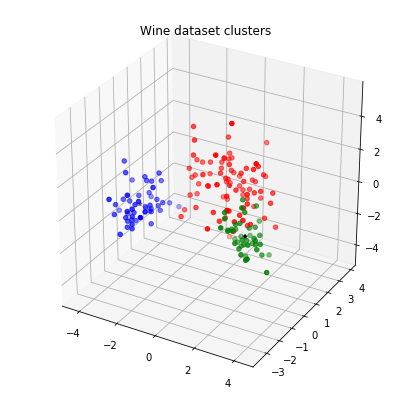

In [23]:
file_handle = open('wine.data')
wine = np.array([list(map(float, file_handle.readline().strip().split(','))) for _ in range(178)], dtype=np.float64)
wine_labels = (wine[:, 0] - 1).astype('int64')
wine = wine[:, 1:]
wine_std = StandardScaler().fit_transform(wine)
pca = PCA(n_components=3)
pca.fit(wine_std)
X_wine = pca.transform(wine_std)

clusters_wine, centroids_wine, labels_wine = k_means(X_wine, 3, wine_labels)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(clusters_wine[0][:, 0], clusters_wine[0][:, 1], clusters_wine[0][:, 2], c='r')
ax.scatter(clusters_wine[1][:, 0], clusters_wine[1][:, 1], clusters_wine[1][:, 2], c='g')
ax.scatter(clusters_wine[2][:, 0], clusters_wine[2][:, 1], clusters_wine[2][:, 2], c='b')
ax.scatter(centroids_wine[:, 0], centroids_wine[:, 1], centroids_wine[:, 2], c='k', marker='*')
plt.title('Wine dataset clusters')
plt.show()

## Question 2

### Clusters Validations

Clustering validation, which evaluates the goodness of clustering results. External clustering validation and internal clustering validation are the two main categories of clustering validation.

The main difference is whether or not external information is used for clustering validation. Unlike external validation measures, which use external information not present in the data, internal validation measures only rely on information in the data.

The internal measures evaluate the goodness of a clustering structure without respect to external information. Since external validation measures know the “true” cluster number in advance, they are mainly used for choosing an optimal clustering algorithm on a specific data set.

On the other hand, internal validation measures can be used to choose the best clustering algorithm as well as the optimal cluster number without any additional information.

In practice, external information such as class labels is often not available in many application scenarios. Therefore, in the situation that there is no external information available, internal validation measures are the only option for cluster validation.

---

### Internal

 RMSSTD = $\sqrt{\frac{\displaystyle\sum_{\substack{
   j=1..p \\
   i=1..k
  }}\displaystyle\sum_{a=1}^{n_{ij}} (x_a - \bar{x_{ij}})^2}{\displaystyle\sum_{\substack{
   j=1..p \\
   i=1..k
  }}(n_{ij} -1 )}}$
  
where $k$ is the number of clusters,

$p$ is  the  number  of  independent  variables in dataset,

$x_{ij} $ is  the  mean  of  data  in  variable  j and cluster i, 

and $n_{ij}$ is  the  number  of  data  which  are  in variable p and cluster k.

#### R- Square:

- RS is used to determine whether  there  is  a  significant  difference  among objects in different groups and that objects in the same group have high similarity.
- The R-squared value is used to determine whether  there  is  a  significant  difference  among objects in different groups and that objects in the same group have high similarity.  If  RS  equals  zero,  then  there  is  no difference between the groups. 
- On the other hand, if RS equals one, then the partitioning of clusters is optimal

$RS = \frac{SS_t - SS_w}{SS_t}$

where $SS_t = \displaystyle\sum_{j=1}^{p} \displaystyle\sum_{a=1}^{n_{ij}} (x_a - \bar{x_{j}})^2 $

and $SS_w = \displaystyle\sum_{\substack{
   j=1..p \\
   i=1..k
  }} \displaystyle\sum_{a=1}^{n_{ij}} (x_a - \bar{x_{ij}})^2 $


where $SS_t$ is  the  summation  of  the  distance squared among all variables,

$SS_w$ is  the  summation  of  the  distance squared among all data in the same cluster, 

$k$ is the number of clusters,

$p$ is the number of independent variables in the dataset,

$x_j$ is the mean of data in variable j,

$x_{ij}$ is the mean of the data in variable j and cluster i and 

$n_{ij}$ is  the  number  of  data  which  are  invariable p and cluster k.


In [5]:
def rmsstd(clusters):
    k = clusters.shape[0]
    ssd = np.zeros(clusters.shape)
    for i in range(k):
        mean = np.mean(clusters[i][0],axis=0)
        ssd[i] = np.sum((clusters[i][0] - mean)**2)
    numerator = np.sum(ssd)
    denominator = 0
    for i in range(k):
        for j in range(clusters[i][0].shape[1]):
            denominator += clusters[i][0].shape[0] - 1
    rmsstd_val = np.sqrt(numerator/denominator)
    return rmsstd_val

def rs(clusters):
    k = clusters.shape[0]
    ssd = np.zeros(clusters.shape)
    total_ssd = np.zeros(clusters.shape)
    
    means = []
    for i in range(k):
        mean = np.mean(clusters[i][0],axis=0)
        ssd[i] = np.sum((clusters[i][0] - mean)**2)
        means.append(list(mean))
    ss_w = np.sum(ssd)
    total_mean = np.mean(means, axis = 0)
    for i in range(k):
        total_ssd[i] = np.sum((clusters[i][0] - total_mean)**2)
    ss_t = np.sum(total_ssd)
    
    rs_val = (ss_t - ss_w) / ss_t
    return rs_val

In [24]:
print("Iris Dataset - RMSSTD: ", rmsstd(clusters_iris.reshape(clusters_iris.shape[0],1)))
print("Iris Dataset - RS: ", rs(clusters_iris.reshape(clusters_iris.shape[0],1)))

print("Wine Dataset - RMSSTD: ", rmsstd(clusters_wine.reshape(clusters_wine.shape[0],1)))
print("Wine Dataset - RS: ", rs(clusters_wine.reshape(clusters_wine.shape[0],1)))

Iris Dataset - RMSSTD:  0.4143548908075644
Iris Dataset - RS:  0.8887168339355047
Wine Dataset - RMSSTD:  1.041089993166481
Wine Dataset - RS:  0.6365681584111675


### Observations

1. The RMSSTD score for the Iris data set is much better than the score for the wine data set. 
    * One of the possible reason that it is so may be because of the fact that the Iris data set is got down to three components using PCA rather, than the wine dataset that was got down from 13 features.
    
2. The RS score for the Iris dataset is again better than that of the wine dataset. Higher value is a better value.
    * The reason for this is again comes fown to the same problem that the amount of variance retained in the first three components might not be the same and is hiher for the Iris dataset.

---
### External

#### Purity

Purity is very similar to entropy. We calculate the purity of a set of clusters. First, we cancel the purity in each cluster. For each cluster, we have the purity  $P_j = \frac{1}{n_j} Max_i(n_j^i)$ is the number of objects in 𝑗 with class label 𝑖. In other words, $P_j$ is a fraction of the overall cluster size that the largest class of objects assigned to that cluster represents. The overall purity of the clustering solution is obtained as a weighted sum of the
individual cluster purities and given as:

$$
Purity = \sum_{j=1}^m \frac{n_j}{n}P_j
$$

Were 𝑛𝑗 is the size of cluster 𝑗, 𝑚 is the number of clusters, and 𝑛 is the total number of objects.

#### F-measure

Combines the precision and recall concepts from information retrival. We then calculate the recall and
precision of that cluster for each class as:
$$
𝑅𝑒𝑐𝑎𝑙𝑙(𝑖,𝑗) = \frac{n_{ij}}{n}
$$

And
$$
 𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛(𝑖,𝑗) = \frac{n_{ij}}{n_j}
$$

Where 𝑛𝑖𝑗 is the number of objects of class 𝑖 that are in cluster 𝑗, 𝑛𝑗 is the number of objects in cluster 𝑗, and 𝑛𝑖, is the number of objects in class 𝑖. The 𝐹 − 𝑀𝑒𝑎𝑠𝑢𝑟𝑒 of cluster 𝑗 and class 𝑖 is given by the following equation:

$$
F(i,j) = \frac{2Recal(i,j) Precison(i,j)}{2Recal(i,j) + Precison(i,j)}
$$

The 𝐹 − 𝑀𝑒𝑎𝑠𝑢𝑟𝑒 values are within the interval [0,1] and larger values indicate higher clustering quality

In [7]:
def purity(y, k, class_count):
    sum = 0
    for i in range(k):
        counts = np.bincount(y[i])
        label = np.argmax(counts)
        max_occurances = counts[label]
        sum += min(class_count[i], max_occurances)
    return sum / np.sum(class_count)

def confusion_matrix(k, labels):
        cm = np.zeros((k, k), int)
        number_of_datapoints = np.sum([labels[i].size for i in range(k)])
        for i in range(k):
            counts = np.bincount(labels[i])
            target = np.argmax(counts)
            for label in labels[i]:
                cm[label, int(target)] += 1
        return cm

def precision(TP, FP):
    return np.around((TP/(TP+FP)),decimals=3)

def recall(TP, FN):
    return np.around((TP/(TP+FN)),decimals=3)


def f_measure(TP, FP, FN):
    precision_val = precision(TP, FP)
    recall_val = recall(TP, FN)
    return 2 * (precision_val * recall_val) / (precision_val + recall_val)

def cm_metrics(cm):
    FP, FN, TN = [], [], []
    for i in range(cm.shape[0]):
        FP.append(sum(cm[:,i]) - cm[i,i])
        FN.append(sum(cm[i,:]) - cm[i,i])
        temp = np.delete(cm, i, 0)   # delete ith row
        temp = np.delete(temp, i, 1)  # delete ith column
        TN.append(sum(sum(temp)))
    return np.diag(cm),FP, FN, TN


#### Purity measure

In [25]:
print("Purity for Iris", purity(labels_iris, 3, [50, 50, 50]))
print("Purity for Wine", purity(labels_wine, 3, [59, 71, 48]))

Purity for Iris 0.88
Purity for Wine 0.8314606741573034


#### Confusion matrix, F-measure

In [26]:
cm = confusion_matrix(3, labels_iris)
print("Confusion Matrix for Iris data: ",cm,sep="\n")
tp, fp, fn, tn = cm_metrics(cm)
f_m = f_measure(tp, fp, fn)
print("Purity: ", purity(labels_iris, 3, [50,50,50]))
print("F-Measure: ", f_m)
print("Average F-Measure: ", np.mean(f_m))

Confusion Matrix for Iris data: 
[[50  0  0]
 [ 0 47  3]
 [ 0 15 35]]
Purity:  0.88
F-Measure:  [1.         0.83924617 0.79543492]
Average F-Measure:  0.8782270295616984


In [27]:
cm = confusion_matrix(3, labels_wine)
print("Confusion Matrix for Wine data: ",cm,sep="\n")
tp, fp, fn, tn = cm_metrics(cm)
f_m = f_measure(tp, fp, fn)
print("Purity: ", purity(labels_wine, 3, [59, 71, 48]))
print("F-Measure: ", f_m)
print("Average F-Measure: ", np.mean(f_m))

Confusion Matrix for Wine data: 
[[42 17  0]
 [ 1 68  2]
 [ 0  1 47]]
Purity:  0.8314606741573034
F-Measure:  [0.82371107 0.86652716 0.9688968 ]
Average F-Measure:  0.886378343613944


### Observations

The Purity and the F-measure of both the Iris and the wine data set are good. This translates to the fact that the cluster that were formed are meaningful. Some knoweledge can be derived from the cluster fomred for furthur analysis.

### Kernel K-means for the Wine dataset

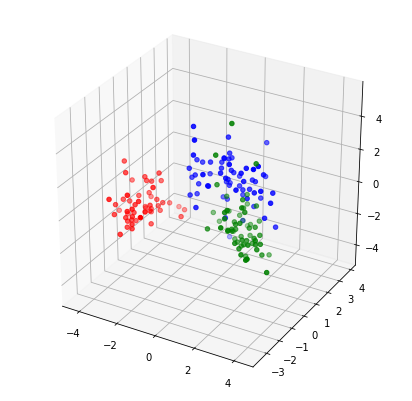

In [11]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters=3, assign_labels="discretize", random_state=0).fit(X_wine)

cluster1 = X_wine[clustering.labels_ == 0]
cluster2 = X_wine[clustering.labels_ == 1]
cluster3 = X_wine[clustering.labels_ == 2]

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster1[:, 0], cluster1[:, 1], cluster1[:, 2], c='r')
ax.scatter(cluster2[:, 0], cluster2[:, 1], cluster2[:, 2], c='g')
ax.scatter(cluster3[:, 0], cluster3[:, 1], cluster3[:, 2], c='b')


### Observations

Both the methods give similar results. An important difference is that the intial cluster are selected using the kmeans++ method in the kernel k-meaans whereas my algorithm does that randomly. Due to this fact, the kernel k-means is gicing out consistent results where as my results fluctuate.